In [26]:
import numpy as np

size = 1000

grid = np.zeros((size, size))

In [48]:
def get_points(radius):
    size = radius+1
    x = np.linspace(0, size-1, size)
    y = np.linspace(0, size-1, size) 

    x1, y1 = np.meshgrid(x, y)

    tot = np.add(np.square(x1), np.square(y1))

    radius = radius+0.5
    outer_radius = (radius)**2
    inner_radius = (radius-1)**2

    tot[tot > outer_radius] = 0
    tot[tot <= inner_radius] = 0
    x_p, y_p = np.where(tot)
    
    return x_p, y_p

In [62]:
num = size//10
print("Points:", num)
x = np.array([np.random.randint(0,size,num), np.random.randint(0,size,num)])
points = np.swapaxes(x,0,1)

Points: 100


In [63]:
points.shape

(100, 2)

In [64]:
count = 0
for p in points:
    count += 1
    grid[p[0]][p[1]] = count

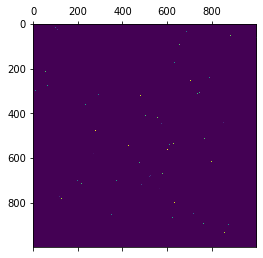

In [65]:
import matplotlib.pyplot as plt

plt.matshow(grid)

In [66]:
from tqdm import tqdm

In [67]:
prev = [(0, 0)]

for i in tqdm(range(200)):
    x_p, y_p = get_points(i+1)
    p_point = np.asarray([x_p, y_p])
    points_two = np.swapaxes(p_point,0,1)
    
    for i in range(points_two.shape[0]):
        points_two = np.append(points_two, [[-points_two[i][0], -points_two[i][1]]], axis=0)
        points_two = np.append(points_two, [[points_two[i][0], -points_two[i][1]]], axis=0)
        points_two = np.append(points_two, [[-points_two[i][0], points_two[i][1]]], axis=0)

    count = 0
    for p in points:
        count += 1
        for val in points_two:
            if (p[0]+val[0] < size and p[0]+val[0] > 0  and  p[1]+val[1] < size and p[1]+val[1] > 0):
                if(grid[p[0]+val[0]][p[1]+val[1]] == 0):
                        grid[p[0]+val[0]][p[1]+val[1]] = count
    


  6%|█████▎                                                                           | 13/200 [00:02<00:30,  6.18it/s]


KeyboardInterrupt: 

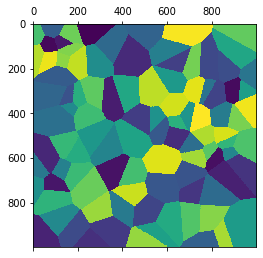

In [9]:
plt.matshow(grid)

In [100]:
grid2

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   7., ...,  96., 103., 102.],
       [  0.,   3.,   4., ...,  99., 100., 101.],
       ...,
       [  0.,  96., 103., ...,   0.,   7.,   6.],
       [  0.,  99., 100., ...,   0.,   4.,   5.],
       [  0.,  98., 101., ...,   0.,   0.,   4.]])

In [72]:

grid = np.zeros((size, size))

prev = [(0, 0)]

count = 0
for p in points:
    count += 1
    grid[p[0]][p[1]] = count


for i in tqdm(range(150)):
    x_p, y_p = get_points(i+1)
    p_point = np.asarray([x_p, y_p])
    points_two = np.swapaxes(p_point,0,1)
    
    for i in range(points_two.shape[0]):
        points_two = np.append(points_two, [[-points_two[i][0], -points_two[i][1]]], axis=0)
        points_two = np.append(points_two, [[points_two[i][0], -points_two[i][1]]], axis=0)
        points_two = np.append(points_two, [[-points_two[i][0], points_two[i][1]]], axis=0)

    count = 0
    rem = []
    for p in points:
        count += 1
        flag = False
        for val in points_two:
            if (p[0]+val[0] < size and p[0]+val[0] > 0  and  p[1]+val[1] < size and p[1]+val[1] > 0):
                if(grid[p[0]+val[0]][p[1]+val[1]] == 0):
                        grid[p[0]+val[0]][p[1]+val[1]] = count
                        flag = True
        if (not flag):
            rem.append(count-1)
            print(rem)
    points = np.delete(points, rem, axis=0)


 33%|███████████████████████████                                                      | 50/150 [00:22<01:19,  1.26it/s]

[6]
[6, 22]



 35%|████████████████████████████                                                     | 52/150 [00:24<01:20,  1.21it/s]

[1]
[1, 63]



 37%|██████████████████████████████▏                                                  | 56/150 [00:27<01:18,  1.20it/s]

[86]



 39%|███████████████████████████████▊                                                 | 59/150 [00:30<01:19,  1.15it/s]

[18]



 44%|███████████████████████████████████▋                                             | 66/150 [00:37<01:20,  1.05it/s]

[37]



 45%|████████████████████████████████████▏                                            | 67/150 [00:38<01:19,  1.04it/s]

[37, 88]



 46%|█████████████████████████████████████▎                                           | 69/150 [00:39<01:18,  1.03it/s]

[62]



 47%|██████████████████████████████████████▎                                          | 71/150 [00:41<01:16,  1.03it/s]

[80]



 49%|███████████████████████████████████████▍                                         | 73/150 [00:43<01:15,  1.02it/s]

[70]
[0]



 50%|████████████████████████████████████████▌                                        | 75/150 [00:45<01:13,  1.03it/s]

[29]



 51%|█████████████████████████████████████████                                        | 76/150 [00:46<01:13,  1.01it/s]

[17]



 51%|█████████████████████████████████████████▌                                       | 77/150 [00:47<01:13,  1.01s/it]

[38]
[38, 50]



 52%|██████████████████████████████████████████                                       | 78/150 [00:48<01:11,  1.00it/s]

[38, 50, 66]



 53%|███████████████████████████████████████████▏                                     | 80/150 [00:50<01:08,  1.03it/s]

[4]
[4, 22]
[4, 22, 42]



 54%|███████████████████████████████████████████▋                                     | 81/150 [00:51<01:08,  1.01it/s]

[2]
[2, 47]
[2, 47, 49]



 55%|████████████████████████████████████████████▎                                    | 82/150 [00:52<01:06,  1.02it/s]

[40]
[40, 52]



 55%|████████████████████████████████████████████▊                                    | 83/150 [00:53<01:04,  1.04it/s]

[42]
[42, 43]



 56%|█████████████████████████████████████████████▎                                   | 84/150 [00:54<01:01,  1.06it/s]

[35]
[35, 39]



 57%|█████████████████████████████████████████████▉                                   | 85/150 [00:55<01:00,  1.07it/s]

[35, 39, 68]
[18]
[18, 37]
[18, 37, 56]



 57%|██████████████████████████████████████████████▍                                  | 86/150 [00:56<00:58,  1.09it/s]

[43]



 59%|███████████████████████████████████████████████▌                                 | 88/150 [00:58<00:53,  1.15it/s]

[20]
[20, 39]



 59%|████████████████████████████████████████████████                                 | 89/150 [00:58<00:53,  1.15it/s]

[17]



 60%|████████████████████████████████████████████████▌                                | 90/150 [00:59<00:51,  1.17it/s]

[17, 58]
[14]
[14, 17]



 61%|█████████████████████████████████████████████████▏                               | 91/150 [01:00<00:49,  1.19it/s]

[14, 17, 49]
[14, 17, 49, 51]
[14]


[14, 32]
[14, 32, 35]
[14, 32, 35, 42]


 61%|█████████████████████████████████████████████████▋                               | 92/150 [01:01<00:46,  1.24it/s]

[14]



 64%|███████████████████████████████████████████████████▊                             | 96/150 [01:03<00:38,  1.40it/s]

[40]
[40, 43]
[6]



 65%|████████████████████████████████████████████████████▍                            | 97/150 [01:04<00:37,  1.42it/s]

[29]
[29, 33]



 65%|████████████████████████████████████████████████████▉                            | 98/150 [01:05<00:36,  1.41it/s]

[15]



 67%|█████████████████████████████████████████████████████▎                          | 100/150 [01:06<00:33,  1.50it/s]

[36]



 67%|█████████████████████████████████████████████████████▊                          | 101/150 [01:07<00:31,  1.56it/s]

[12]



 69%|██████████████████████████████████████████████████████▉                         | 103/150 [01:08<00:30,  1.56it/s]

[29]
[29, 40]



 69%|███████████████████████████████████████████████████████▍                        | 104/150 [01:09<00:28,  1.61it/s]

[15]



 70%|████████████████████████████████████████████████████████                        | 105/150 [01:09<00:27,  1.63it/s]

[7]
[7, 14]



 71%|████████████████████████████████████████████████████████▌                       | 106/150 [01:10<00:26,  1.66it/s]

[7, 14, 34]



 71%|█████████████████████████████████████████████████████████                       | 107/150 [01:10<00:25,  1.70it/s]

[17]



 72%|█████████████████████████████████████████████████████████▌                      | 108/150 [01:11<00:24,  1.72it/s]

[7]



 74%|███████████████████████████████████████████████████████████▏                    | 111/150 [01:12<00:21,  1.84it/s]

[0]


[0, 12]


 75%|████████████████████████████████████████████████████████████▎                   | 113/150 [01:13<00:19,  1.90it/s]

[5]
[5, 14]



 76%|████████████████████████████████████████████████████████████▊                   | 114/150 [01:14<00:18,  1.92it/s]

[5, 14, 30]
[0]



 77%|█████████████████████████████████████████████████████████████▎                  | 115/150 [01:14<00:17,  1.96it/s]

[0, 16]
[0, 16, 20]


[5]


 79%|███████████████████████████████████████████████████████████████▍                | 119/150 [01:16<00:13,  2.35it/s]

[2]



 80%|████████████████████████████████████████████████████████████████                | 120/150 [01:16<00:12,  2.37it/s]

[2, 20]



 81%|█████████████████████████████████████████████████████████████████               | 122/150 [01:17<00:11,  2.48it/s]

[20]
[0]



 82%|█████████████████████████████████████████████████████████████████▌              | 123/150 [01:18<00:10,  2.54it/s]

[0, 12]
[0, 12, 17]



 84%|███████████████████████████████████████████████████████████████████▏            | 126/150 [01:19<00:08,  2.94it/s]

[15]



 85%|███████████████████████████████████████████████████████████████████▋            | 127/150 [01:19<00:07,  2.97it/s]

[8]
[8, 12]



 85%|████████████████████████████████████████████████████████████████████▎           | 128/150 [01:19<00:06,  3.15it/s]

[0]



 87%|█████████████████████████████████████████████████████████████████████▊          | 131/150 [01:20<00:05,  3.58it/s]

[12]



 93%|██████████████████████████████████████████████████████████████████████████▏     | 139/150 [01:22<00:02,  4.12it/s]

[11]
[9]



 98%|██████████████████████████████████████████████████████████████████████████████▍ | 147/150 [01:24<00:00,  4.63it/s]

[4]



 99%|███████████████████████████████████████████████████████████████████████████████▍| 149/150 [01:24<00:00,  4.74it/s]

[3]
[3, 6]



100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:24<00:00,  1.77it/s]


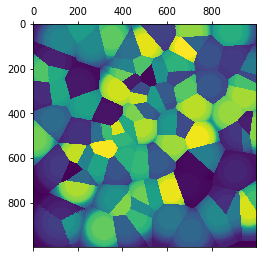

In [73]:
plt.matshow(grid)